# Conformal completion of Minkowski spacetime

This Jupyter/SageMath worksheet is relative to the lectures
[Geometry and physics of black holes](http://luth.obspm.fr/~luthier/gourgoulhon/bh16/)
  
These computations are based on [SageManifolds](http://sagemanifolds.obspm.fr) (v0.9)

The worksheet file (ipynb format) can be downloaded from [here](https://raw.githubusercontent.com/egourgoulhon/BHLectures/master/sage/conformal_Minkowski.ipynb).


First we set up the notebook to display mathematical objects using LaTeX formatting:

In [1]:
%display latex

## Spherical coordinates on Minkowski spacetime

We declare the spacetime manifold $M$:

In [2]:
M = Manifold(4, 'M')
print M

4-dimensional differentiable manifold M


and the spherical coordinates $(t,r,\theta,\phi)$ as a chart on $M$:

In [3]:
XS.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')
XS

Chart (M, (t, r, th, ph))

In [4]:
XS.coord_range()

t: (-oo, +oo); r: (0, +oo); th: (0, pi); ph: (0, 2*pi)

In term of these coordinates, the Minkowski metric is

In [5]:
g = M.lorentzian_metric('g')
g[0,0] = -1
g[1,1] = 1
g[2,2] = r^2
g[3,3] = r^2*sin(th)^2
g.display()

g = -dt*dt + dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

## Null coordinates

Let us introduce the null coordinates $u=t-r$ (retarded time) and $v=t+r$ (advanced time):

In [6]:
XN.<u,v,th,ph> = M.chart(r'u v th:(0,pi):\theta ph:(0,2*pi):\phi')
XN.add_restrictions(v-u>0)
XN

Chart (M, (u, v, th, ph))

In [7]:
XN.coord_range()

u: (-oo, +oo); v: (-oo, +oo); th: (0, pi); ph: (0, 2*pi)

In [8]:
XS_to_XN = XS.transition_map(XN, [t-r, t+r, th, ph])
XS_to_XN.display()

u = -r + t
v = r + t
th = th
ph = ph

In [9]:
XS_to_XN.inverse().display()

t = 1/2*u + 1/2*v
r = -1/2*u + 1/2*v
th = th
ph = ph

In terms of the null coordinates $(u,v,\theta,\phi)$, the Minkowski metric writes

In [10]:
g.display(XN.frame(), XN)

g = -1/2 du*dv - 1/2 dv*du + (1/4*u^2 - 1/2*u*v + 1/4*v^2) dth*dth + (1/4*u^2*sin(th)^2 - 1/2*u*v*sin(th)^2 + 1/4*v^2*sin(th)^2) dph*dph

Let us plot the coordinate grid $(u,v)$ in terms of the coordinates $(t,r)$:

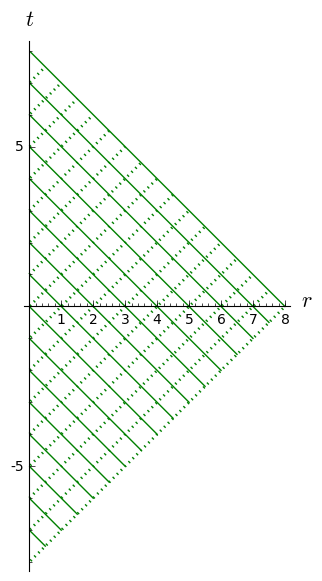

In [11]:
graph = XN.plot(XS, ambient_coords=(r,t), fixed_coords={th: pi/2, ph: pi}, nb_values=17,
                plot_points=200, color='green', style={u: '-', v: ':'}, thickness={u: 1, v: 2})
show(graph)

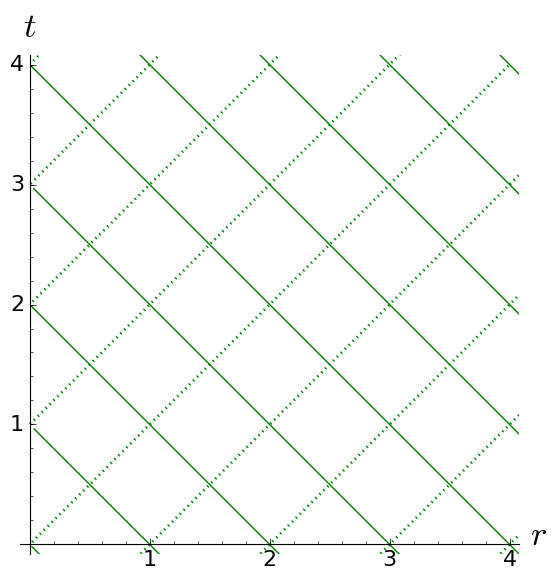

In [12]:
show(graph, xmin=0, xmax=4, ymin=0, ymax=4, aspect_ratio=1, fontsize=16)

In [13]:
graph.save("glo_null_coord.pdf", xmin=0, xmax=4, ymin=0, ymax=4, aspect_ratio=1, fontsize=16)

## Compactified null coordinates

Instead of $(u,v)$, which span $\mathbb{R}$, let consider the coordinates $U = \mathrm{atan}\,  u$ and $V = \mathrm{atan}\, v$, which span $\left(-\frac{\pi}{2}, \frac{\pi}{2}\right)$:

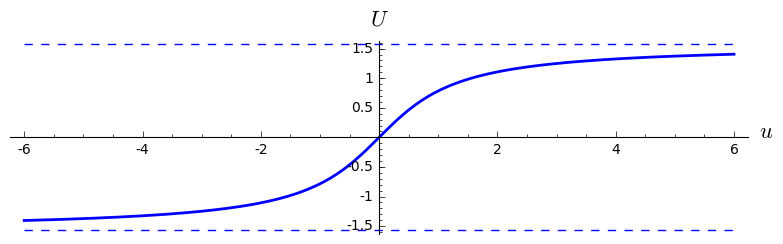

In [14]:
graph = plot(atan(u), (u,-6, 6), thickness=2, axes_labels=[r'$u$', r'$U$']) + \
        line([(-6,-pi/2), (6,-pi/2)], linestyle='--') + \
        line([(-6,pi/2), (6,pi/2)], linestyle='--')
show(graph, aspect_ratio=1)

In [15]:
graph.save('glo_atan.pdf', aspect_ratio=1)

In [16]:
XNC.<U,V,th,ph> = M.chart(r'U:(-pi/2,pi/2) V:(-pi/2,pi/2) th:(0,pi):\theta ph:(0,2*pi):\phi')
XNC.add_restrictions(V-U>0)
XNC

Chart (M, (U, V, th, ph))

In [17]:
XNC.coord_range()

U: (-1/2*pi, 1/2*pi); V: (-1/2*pi, 1/2*pi); th: (0, pi); ph: (0, 2*pi)

In [18]:
XN_to_XNC = XN.transition_map(XNC, [atan(u), atan(v), th, ph])
XN_to_XNC.display()

U = arctan(u)
V = arctan(v)
th = th
ph = ph

In [19]:
XN_to_XNC.inverse().display()

u = tan(U)
v = tan(V)
th = th
ph = ph

Expressed in terms of the coordinates $(U,V,\theta,\phi)$, the metric tensor is

In [20]:
g.display(XNC.frame(), XNC)

g = -1/2/(cos(U)^2*cos(V)^2) dU*dV - 1/2/(cos(U)^2*cos(V)^2) dV*dU + 1/4*(cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2)/(cos(U)^2*cos(V)^2) dth*dth + 1/4*(cos(V)^2*sin(U)^2*sin(th)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V)*sin(th)^2 + cos(U)^2*sin(V)^2*sin(th)^2)/(cos(U)^2*cos(V)^2) dph*dph

Let us call $\Omega^{-2}$ the common factor: 

In [21]:
Omega = M.scalar_field({XNC: 2*cos(U)*cos(V)}, name='Omega', latex_name=r'\Omega')
Omega.display()

Omega: M --> R
   (u, v, th, ph) |--> 2/(sqrt(u^2 + 1)*sqrt(v^2 + 1))
   (U, V, th, ph) |--> 2*cos(U)*cos(V)

In [22]:
Omega.display(XS)

Omega: M --> R
   (t, r, th, ph) |--> 2/(sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1))

## Conformal metric

We introduce the metric $\tilde g = \Omega^2 g$:

In [23]:
gt = M.lorentzian_metric('gt', latex_name=r'\tilde{g}')
gt.set(Omega^2*g)
gt.display(XNC.frame(), XNC)

gt = -2 dU*dV - 2 dV*dU + (cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2) dth*dth + (cos(V)^2*sin(U)^2*sin(th)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V)*sin(th)^2 + cos(U)^2*sin(V)^2*sin(th)^2) dph*dph

Clearly the metric components ${\tilde g}_{\theta\theta}$ and ${\tilde g}_{\phi\phi}$ can be simplified further. Let us do it by hand, by extracting the symbolic expression via `expr()`:

In [24]:
g22 = gt[XNC.frame(), 2, 2, XNC].expr()
g22

cos(V)^2*sin(U)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V) + cos(U)^2*sin(V)^2

In [25]:
g22.factor().reduce_trig()

sin(-U + V)^2

In [26]:
g33st = gt[XNC.frame(), 3, 3, XNC].expr() / sin(th)^2
g33st

(cos(V)^2*sin(U)^2*sin(th)^2 - 2*cos(U)*cos(V)*sin(U)*sin(V)*sin(th)^2 + cos(U)^2*sin(V)^2*sin(th)^2)/sin(th)^2

In [27]:
g33st.factor().reduce_trig()

sin(-U + V)^2

In [28]:
gt.add_comp(XNC.frame())[2,2, XNC] = g22.factor().reduce_trig()
gt.add_comp(XNC.frame())[3,3, XNC] = g33st.factor().reduce_trig() * sin(th)^2

Hence the final form of the conformal metric in terms of the compactified null coordinates:

In [29]:
gt.display(XNC.frame(), XNC)

gt = -2 dU*dV - 2 dV*dU + sin(-U + V)^2 dth*dth + sin(-U + V)^2*sin(th)^2 dph*dph

In terms of the non-compactified null coordinates $(u,v,\theta,\phi)$:

In [30]:
gt.display(XN.frame(), XN)

gt = -2/((u^2 + 1)*v^2 + u^2 + 1) du*dv - 2/((u^2 + 1)*v^2 + u^2 + 1) dv*du + (u^2 - 2*u*v + v^2)/((u^2 + 1)*v^2 + u^2 + 1) dth*dth + (u^2*sin(th)^2 - 2*u*v*sin(th)^2 + v^2*sin(th)^2)/((u^2 + 1)*v^2 + u^2 + 1) dph*dph

and in terms of the default coordinates $(t,r,\theta,\phi)$:

In [31]:
gt.display()

gt = -4/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1) dt*dt + 4/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1) dr*dr + 4*r^2/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1) dth*dth + 4*r^2*sin(th)^2/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1) dph*dph

## Einstein cylinder coordinates

Let us introduce some coordinates $(\tau,\chi)$ such that the null coordinates $(U,V)$ are
respectively half the retarded time $\tau -\chi$ and half the advanced time $\tau+\chi$:

In [32]:
XC.<tau,ch,th,ph> = M.chart(r'tau:(-pi,pi):\tau ch:(0,pi):\chi th:(0,pi):\theta ph:(0,2*pi):\phi')
XC.add_restrictions([tau<pi-ch, tau>ch-pi])
XC

Chart (M, (tau, ch, th, ph))

In [33]:
XC.coord_range()

tau: (-pi, pi); ch: (0, pi); th: (0, pi); ph: (0, 2*pi)

In [34]:
XC_to_XNC = XC.transition_map(XNC, [(tau-ch)/2, (tau+ch)/2, th, ph])
XC_to_XNC.display()

U = -1/2*ch + 1/2*tau
V = 1/2*ch + 1/2*tau
th = th
ph = ph

In [35]:
XC_to_XNC.inverse().display()

tau = U + V
ch = -U + V
th = th
ph = ph

The conformal metric takes then the form of the standard metric on the Einstein cylinder
$\mathbb{R}\times\mathbb{S}^3$:

In [36]:
gt.display(XC.frame(), XC)

gt = -dtau*dtau + dch*dch + sin(ch)^2 dth*dth + sin(ch)^2*sin(th)^2 dph*dph

The square of the conformal factor expressed in all the coordinates introduced so far:

In [37]:
(Omega^2).display()

Omega^2: M --> R
   (t, r, th, ph) |--> 4/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1)
   (u, v, th, ph) |--> 4/((u^2 + 1)*v^2 + u^2 + 1)
   (U, V, th, ph) |--> 4*cos(U)^2*cos(V)^2
   (tau, ch, th, ph) |--> 4*cos(1/2*ch)^4*cos(1/2*tau)^4 - 8*cos(1/2*ch)^2*cos(1/2*tau)^2*sin(1/2*ch)^2*sin(1/2*tau)^2 + 4*sin(1/2*ch)^4*sin(1/2*tau)^4

In [38]:
XS_to_XC = M.coord_change(XNC,XC) * M.coord_change(XN, XNC) * M.coord_change(XS, XN)
XS_to_XC.display()

tau = arctan(r + t) + arctan(-r + t)
ch = arctan(r + t) - arctan(-r + t)
th = th
ph = ph

In [39]:
XC_to_XS = M.coord_change(XN, XS) * M.coord_change(XNC, XN) * M.coord_change(XC,XNC)
XC_to_XS.display()

t = cos(1/2*tau)*sin(1/2*tau)/(cos(1/2*ch)^2*cos(1/2*tau)^2 - sin(1/2*ch)^2*sin(1/2*tau)^2)
r = cos(1/2*ch)*sin(1/2*ch)/(cos(1/2*ch)^2*cos(1/2*tau)^2 - sin(1/2*ch)^2*sin(1/2*tau)^2)
th = th
ph = ph

The expressions for $t$ and $r$ can be simplified:

In [40]:
tc = XC_to_XS(tau,ch,th,ph)[0]
tc

cos(1/2*tau)*sin(1/2*tau)/(cos(1/2*ch)^2*cos(1/2*tau)^2 - sin(1/2*ch)^2*sin(1/2*tau)^2)

In [41]:
tc.reduce_trig()

sin(tau)/(cos(ch) + cos(tau))

In [42]:
rc = XC_to_XS(tau,ch,th,ph)[1]
rc

cos(1/2*ch)*sin(1/2*ch)/(cos(1/2*ch)^2*cos(1/2*tau)^2 - sin(1/2*ch)^2*sin(1/2*tau)^2)

In [43]:
rc.reduce_trig()

sin(ch)/(cos(ch) + cos(tau))

In [44]:
XS_to_XC.set_inverse(tc.reduce_trig(), rc.reduce_trig(), th, ph)
XC_to_XS = XS_to_XC.inverse()

Check of the inverse coordinate transformation:
   t == t
   r == r
   th == th
   ph == ph
   tau == arctan((sin(ch) + sin(tau))/(cos(ch) + cos(tau))) + arctan(-(sin(ch) - sin(tau))/(cos(ch) + cos(tau)))
   ch == arctan((sin(ch) + sin(tau))/(cos(ch) + cos(tau))) - arctan(-(sin(ch) - sin(tau))/(cos(ch) + cos(tau)))
   th == th
   ph == ph


In [45]:
XC_to_XS.display()

t = sin(tau)/(cos(ch) + cos(tau))
r = sin(ch)/(cos(ch) + cos(tau))
th = th
ph = ph

## Conformal Penrose diagram

Let us draw the coordinate grid $(t,r)$ in terms of the coordinates $(\tau,\chi)$:

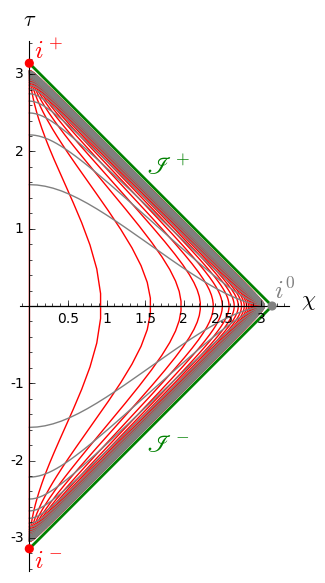

In [46]:
graphXS = XS.plot(XC, ambient_coords=(ch, tau), fixed_coords={th: pi/2, ph: pi}, 
                  plot_points=200, max_range=20, nb_values=41, color={t: 'red', r: 'grey'})
graph_i0 = circle((pi,0), 0.05, fill=True, color='grey') + \
           text(r"$i^0$", (3.3, 0.2), fontsize=18, color='grey') 
graph_ip = circle((0,pi), 0.05, fill=True, color='red') + \
           text(r"$i^+$", (0.25, 3.3), fontsize=18, color='red')
graph_im = circle((0,-pi), 0.05, fill=True, color='red') + \
           text(r"$i^-$", (0.25, -3.3), fontsize=18, color='red')
graph_Ip = line([(0,pi), (pi,0)], color='green', thickness=2) + \
           text(r"$\mathscr{I}^+$", (1.8, 1.8), fontsize=18, color='green')
graph_Im = line([(0,-pi), (pi,0)], color='green', thickness=2) + \
           text(r"$\mathscr{I}^-$", (1.8, -1.8), fontsize=18, color='green')
graph = graphXS + graph_i0 + graph_ip + graph_im + graph_Ip + graph_Im
show(graph)

In [47]:
graph.save('glo_conf_diag_Mink.pdf')

Some blow-up near $i^0$:

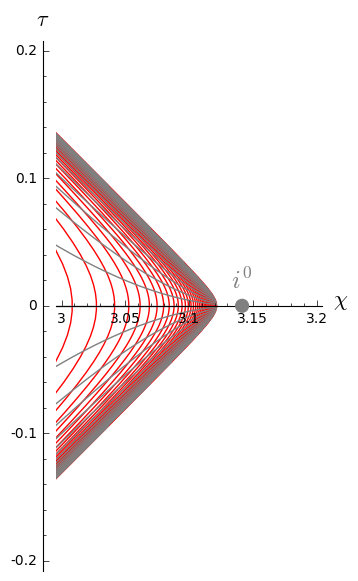

In [48]:
graph = XS.plot(XC, ambient_coords=(ch, tau), fixed_coords={th: pi/2, ph: pi}, 
                plot_points=200, max_range=100, nb_values=41, color={t: 'red', r: 'grey'})
graph += circle((pi,0), 0.005, fill=True, color='grey') + \
         text(r"$i^0$", (pi, 0.02), fontsize=18, color='grey') 
show(graph, xmin=3., xmax=3.2, ymin=-0.2, ymax=0.2, aspect_ratio=1)

To produce a more satisfactory figure, let us use some logarithmic radial coordinate:

In [49]:
XL.<t, rh, th, ph> = M.chart(r't rh:\rho th:(0,pi):\theta ph:(0,2*pi):\phi')
XL

Chart (M, (t, rh, th, ph))

In [50]:
XS_to_XL = XS.transition_map(XL, [t, ln(r), th, ph])
XS_to_XL.display()

t = t
rh = log(r)
th = th
ph = ph

In [51]:
XS_to_XL.inverse().display()

t = t
r = e^rh
th = th
ph = ph

In [52]:
XL_to_XC = M.coord_change(XS, XC) * M.coord_change(XL, XS)
XC_to_XL = M.coord_change(XS, XL) * M.coord_change(XC, XS)

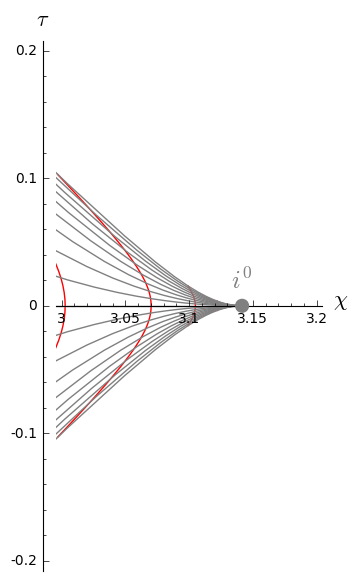

In [53]:
graph = XL.plot(XC, ambient_coords=(ch, tau), fixed_coords={th: pi/2, ph: pi}, 
                ranges={t: (-20, 20), rh: (-2, 10)}, nb_values=19, 
                color={t: 'red', rh: 'grey'})
graph += circle((pi,0), 0.005, fill=True, color='grey') + \
         text(r"$i^0$", (pi, 0.02), fontsize=18, color='grey') 
show(graph, xmin=3., xmax=3.2, ymin=-0.2, ymax=0.2, aspect_ratio=1)

### Null radial geodesics in the conformal diagram

To get a view of the null radial geodesics in the conformal diagram, it suffices to plot the chart $(u,v,\theta,\phi)$ in terms of the chart $(\tau,\chi,\theta,\phi)$. 
The following plot shows 
- the null geodesics defined by $(u,\theta,\phi) = (u_0, \pi/2,\pi)$ for 17 values of $u_0$ evenly spaced in $[-8,8]$ (dashed lines) 
- the null geodesics defined by $(v,\theta,\phi) = (v_0, \pi/2,\pi)$ for 17 values of $v_0$ evenly spaced in $[-8,8]$ (solid lines)

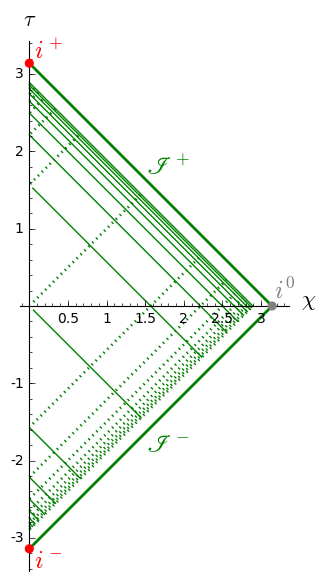

In [86]:
graphXN = XN.plot(XC, ambient_coords=(ch, tau), fixed_coords={th: pi/2, ph: pi}, 
                  nb_values=17, plot_points=150, color='green', 
                  style={u: '-', v: ':'}, thickness={u: 1, v: 2})
graph = graphXN + graph_i0 + graph_ip + graph_im + graph_Ip + graph_Im
show(graph)

In [87]:
graph.save('glo_conf_Mink_null.pdf')

## Conformal factor

The conformal factor expressed in various coordinate systems:

In [55]:
Omega.display()

Omega: M --> R
   (t, r, th, ph) |--> 2/(sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1))
   (u, v, th, ph) |--> 2/(sqrt(u^2 + 1)*sqrt(v^2 + 1))
   (U, V, th, ph) |--> 2*cos(U)*cos(V)
   (tau, ch, th, ph) |--> 2*cos(1/2*ch)^2*cos(1/2*tau)^2 - 2*sin(1/2*ch)^2*sin(1/2*tau)^2
   (t, rh, th, ph) |--> 2/(sqrt(t^2 + 2*t*e^rh + e^(2*rh) + 1)*sqrt(t^2 - 2*t*e^rh + e^(2*rh) + 1))

The expression in terms of $(\tau,\chi,\theta,\phi)$ can be simplified:

In [56]:
Omega.expr(XC)

2*cos(1/2*ch)^2*cos(1/2*tau)^2 - 2*sin(1/2*ch)^2*sin(1/2*tau)^2

In [57]:
s = Omega.expr(XC) - cos(tau) - cos(ch)
s.trig_reduce()

0

Hence we set

In [58]:
Omega.add_expr(cos(tau) + cos(ch), XC)
Omega.display()

Omega: M --> R
   (t, r, th, ph) |--> 2/(sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1))
   (u, v, th, ph) |--> 2/(sqrt(u^2 + 1)*sqrt(v^2 + 1))
   (U, V, th, ph) |--> 2*cos(U)*cos(V)
   (tau, ch, th, ph) |--> cos(ch) + cos(tau)
   (t, rh, th, ph) |--> 2/(sqrt(t^2 + 2*t*e^rh + e^(2*rh) + 1)*sqrt(t^2 - 2*t*e^rh + e^(2*rh) + 1))

A plot of $\Omega$ in terms of the coordinates $(\tau,\chi)$:

In [59]:
graph = plot3d(Omega.expr(XC), (tau,-pi,pi), (ch,0,pi), adaptive=True) + \
        plot3d(0, (tau,-pi,pi), (ch,0,pi), color='yellow', opacity=0.7)
graph = set_axes_labels(graph, 'tau', 'chi', '')
show(graph, aspect_ratio=1)

Graphics3d Object

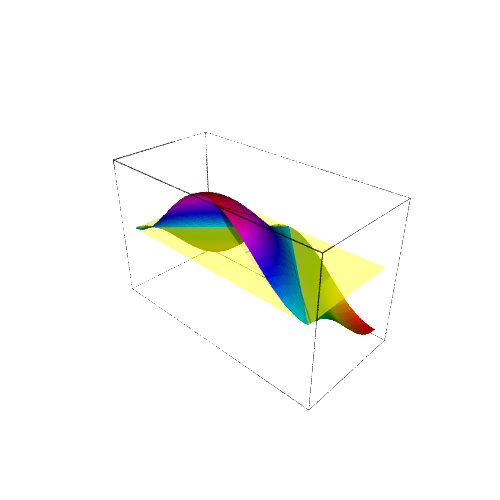

In [60]:
show(graph, aspect_ratio=1, viewer='tachyon')

### Differential of the conformal factor

The 1-form $\mathrm{d}\Omega$ is:

In [61]:
dOmega = Omega.differential()
print dOmega

1-form dOmega on the 4-dimensional differentiable manifold M


In [62]:
dOmega.display()

dOmega = -4*(t^3 - (r^2 - 1)*t)*sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1)/(r^8 + t^8 - 4*(r^2 - 1)*t^6 + 4*r^6 + 2*(3*r^4 - 2*r^2 + 3)*t^4 + 6*r^4 - 4*(r^6 + r^4 - r^2 - 1)*t^2 + 4*r^2 + 1) dt - 4*(r^3 - r*t^2 + r)*sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1)/(r^8 + t^8 - 4*(r^2 - 1)*t^6 + 4*r^6 + 2*(3*r^4 - 2*r^2 + 3)*t^4 + 6*r^4 - 4*(r^6 + r^4 - r^2 - 1)*t^2 + 4*r^2 + 1) dr

In [63]:
dOmega.display(XNC.frame(), XNC)

dOmega = -2*cos(V)*sin(U) dU - 2*cos(U)*sin(V) dV

In [64]:
M.set_default_chart(XNC)
M.set_default_frame(XNC.frame())

In [65]:
dOmega.display()

dOmega = -2*cos(V)*sin(U) dU - 2*cos(U)*sin(V) dV

In [66]:
dOmega1 = M.one_form()
dOmega1[0] = -2*cos(V)*sin(U)
dOmega1[1] = -2*cos(U)*sin(V)
dOmega1.display()

-2*cos(V)*sin(U) dU - 2*cos(U)*sin(V) dV

In [67]:
dOmega1.display(XC.frame(), XC)

-2*cos(1/2*tau)*sin(1/2*tau) dtau - 2*cos(1/2*ch)*sin(1/2*ch) dch

## Einstein static universe

In [68]:
E = Manifold(4, 'E')
print E

4-dimensional differentiable manifold E


In [69]:
XE.<tau,ch,th,ph> = E.chart(r'tau:\tau ch:(0,pi):\chi th:(0,pi):\theta ph:(0,2*pi):\phi')
XE

Chart (E, (tau, ch, th, ph))

In [70]:
XE.coord_range()

tau: (-oo, +oo); ch: (0, pi); th: (0, pi); ph: (0, 2*pi)

In [71]:
XC.coord_range()

tau: (-pi, pi); ch: (0, pi); th: (0, pi); ph: (0, 2*pi)

## Embedding of $M$ in $E$

In [72]:
Phi = M.diff_map(E, {(XC, XE): [tau, ch, th, ph]},
                 name='Phi', latex_name=r'\Phi')
print Phi ; Phi.display()

Differentiable map Phi from the 4-dimensional differentiable manifold M to the 4-dimensional differentiable manifold E


Phi: M --> E
   (t, r, th, ph) |--> (tau, ch, th, ph) = (arctan(r + t) + arctan(-r + t), arctan(r + t) - arctan(-r + t), th, ph)
   (u, v, th, ph) |--> (tau, ch, th, ph) = (arctan(u) + arctan(v), -arctan(u) + arctan(v), th, ph)
   (U, V, th, ph) |--> (tau, ch, th, ph) = (arctan(sin(U)/cos(U)) + arctan(sin(V)/cos(V)), -arctan(sin(U)/cos(U)) + arctan(sin(V)/cos(V)), th, ph)
   (tau, ch, th, ph) |--> (tau, ch, th, ph) = (tau, ch, th, ph)
   (t, rh, th, ph) |--> (tau, ch, th, ph) = (arctan(t + e^rh) + arctan(t - e^rh), arctan(t + e^rh) - arctan(t - e^rh), th, ph)

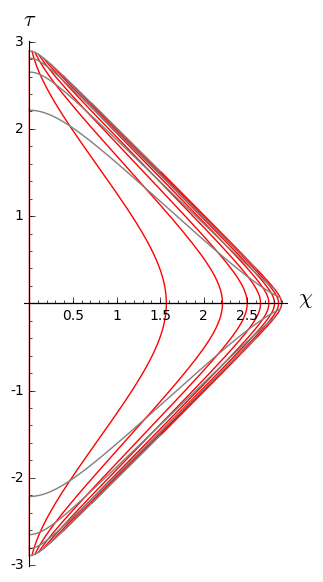

In [85]:
XS.plot(XE, mapping=Phi, ambient_coords=(ch, tau), fixed_coords={th: pi/2, ph: pi}, 
        plot_points=200, color={t: 'red', r: 'grey'})

## Embedding of $E$ in $\mathbb{R}^5$

In [74]:
R5 = Manifold(5, 'R^5', latex_name=r'\mathbb{R}^5')
print R5

5-dimensional differentiable manifold R^5


In [75]:
X5.<tau,W,X,Y,Z> = R5.chart(r'tau:\tau W X Y Z')
X5

Chart (R^5, (tau, W, X, Y, Z))

In [76]:
Psi = E.diff_map(R5, {(XE, X5): [tau,
                                 cos(ch),
                                 sin(ch)*sin(th)*cos(ph), 
                                 sin(ch)*sin(th)*sin(ph), 
                                 sin(ch)*cos(th)]},
                 name='Psi', latex_name=r'\Psi')
print Psi ; Psi.display()

Differentiable map Psi from the 4-dimensional differentiable manifold E to the 5-dimensional differentiable manifold R^5


Psi: E --> R^5
   (tau, ch, th, ph) |--> (tau, W, X, Y, Z) = (tau, cos(ch), cos(ph)*sin(ch)*sin(th), sin(ch)*sin(ph)*sin(th), cos(th)*sin(ch))

The Einstein cylinder:

In [77]:
graphE = XE.plot(X5, ambient_coords=(W,X,tau), mapping=Psi, fixed_coords={th:pi/2, ph:0.001}, 
                 max_range=4, nb_values=9, color='silver', thickness=0.5,
                 label_axes=False)  # phi = 0 
graphE += XE.plot(X5, ambient_coords=(W,X,tau), mapping=Psi, fixed_coords={th:pi/2, ph:pi}, 
                  max_range=4, nb_values=9, color='silver', thickness=0.5)  # phi = pi
show(graphE)

Graphics3d Object

## Embedding of $M$ in $\mathbb{R}^5$

The embedding $\Theta:\, M\rightarrow \mathbb{R}^5$ is obtained by composition of the embeddings
$\Phi:\, M\rightarrow E$ and $\Psi:\, E\rightarrow \mathbb{R}^5$:

In [78]:
Theta = Psi * Phi
print Theta
Theta.display()

Differentiable map from the 4-dimensional differentiable manifold M to the 5-dimensional differentiable manifold R^5


M --> R^5
   (t, r, th, ph) |--> (tau, W, X, Y, Z) = (arctan(r + t) + arctan(-r + t), -sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1)*(r^2 - t^2 - 1)/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1), 2*sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1)*r*cos(ph)*sin(th)/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1), 2*sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1)*r*sin(ph)*sin(th)/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1), 2*sqrt(r^2 + 2*r*t + t^2 + 1)*sqrt(r^2 - 2*r*t + t^2 + 1)*r*cos(th)/(r^4 + t^4 - 2*(r^2 - 1)*t^2 + 2*r^2 + 1))
   (u, v, th, ph) |--> (tau, W, X, Y, Z) = (arctan(u) + arctan(v), sqrt(u^2 + 1)*(u*v + 1)*sqrt(v^2 + 1)/((u^2 + 1)*v^2 + u^2 + 1), -(u*cos(ph)*sin(th) - v*cos(ph)*sin(th))*sqrt(u^2 + 1)*sqrt(v^2 + 1)/((u^2 + 1)*v^2 + u^2 + 1), -(u*sin(ph)*sin(th) - v*sin(ph)*sin(th))*sqrt(u^2 + 1)*sqrt(v^2 + 1)/((u^2 + 1)*v^2 + u^2 + 1), -sqrt(u^2 + 1)*sqrt(v^2 + 1)*(u*cos(th) - v*cos(th))/((u^2 + 1)*v^2 + u^2 + 1))
   (U, V, th, ph) |--> (tau, W, X, Y, Z) = (arctan(sin(U)/cos(U)) + arctan(sin(V)/cos(V)), (abs(cos(U))*cos(U)*cos(V) + abs(cos(U))*sin(U)*sin(V))*abs(cos(V))/(cos(U)*cos(V)), -(abs(cos(U))*cos(V)*cos(ph)*sin(U)*sin(th) - abs(cos(U))*cos(U)*cos(ph)*sin(V)*sin(th))*abs(cos(V))/(cos(U)*cos(V)), -(abs(cos(U))*cos(V)*sin(U)*sin(ph)*sin(th) - abs(cos(U))*cos(U)*sin(V)*sin(ph)*sin(th))*abs(cos(V))/(cos(U)*cos(V)), -(abs(cos(U))*cos(V)*cos(th)*sin(U) - abs(cos(U))*cos(U)*cos(th)*sin(V))*abs(cos(V))/(cos(U)*cos(V)))
   (tau, ch, th, ph) |--> (tau, W, X, Y, Z) = (tau, cos(ch), cos(ph)*sin(ch)*sin(th), sin(ch)*sin(ph)*sin(th), cos(th)*sin(ch))
   (t, rh, th, ph) |--> (tau, W, X, Y, Z) = (arctan(t + e^rh) + arctan(t - e^rh), sqrt(t^2 + 2*t*e^rh + e^(2*rh) + 1)*sqrt(t^2 - 2*t*e^rh + e^(2*rh) + 1)*(t^2 - e^(2*rh) + 1)/(t^4 - 2*t^2*(e^(2*rh) - 1) + e^(4*rh) + 2*e^(2*rh) + 1), 2*sqrt(t^2 + 2*t*e^rh + e^(2*rh) + 1)*sqrt(t^2 - 2*t*e^rh + e^(2*rh) + 1)*cos(ph)*e^rh*sin(th)/(t^4 - 2*t^2*(e^(2*rh) - 1) + e^(4*rh) + 2*e^(2*rh) + 1), 2*sqrt(t^2 + 2*t*e^rh + e^(2*rh) + 1)*sqrt(t^2 - 2*t*e^rh + e^(2*rh) + 1)*e^rh*sin(ph)*sin(th)/(t^4 - 2*t^2*(e^(2*rh) - 1) + e^(4*rh) + 2*e^(2*rh) + 1), 2*sqrt(t^2 + 2*t*e^rh + e^(2*rh) + 1)*sqrt(t^2 - 2*t*e^rh + e^(2*rh) + 1)*cos(th)*e^rh/(t^4 - 2*t^2*(e^(2*rh) - 1) + e^(4*rh) + 2*e^(2*rh) + 1))

In [79]:
graphM = XS.plot(X5, ambient_coords=(W,X,tau), mapping=Theta, fixed_coords={th:pi/2, ph:0.001}, 
                 max_range=30, nb_values=41, plot_points=250, color={t:'red', r:'black'}, 
                 label_axes=False)  # phi = 0 
graphM += XS.plot(X5, ambient_coords=(W,X,tau), mapping=Theta, fixed_coords={th:pi/2, ph:pi}, 
                  max_range=30, nb_values=41, plot_points=250, color={t:'red', r:'black'}, 
                  label_axes=False)  # phi = pi
show(graphE+graphM, aspect_ratio=1)

Graphics3d Object

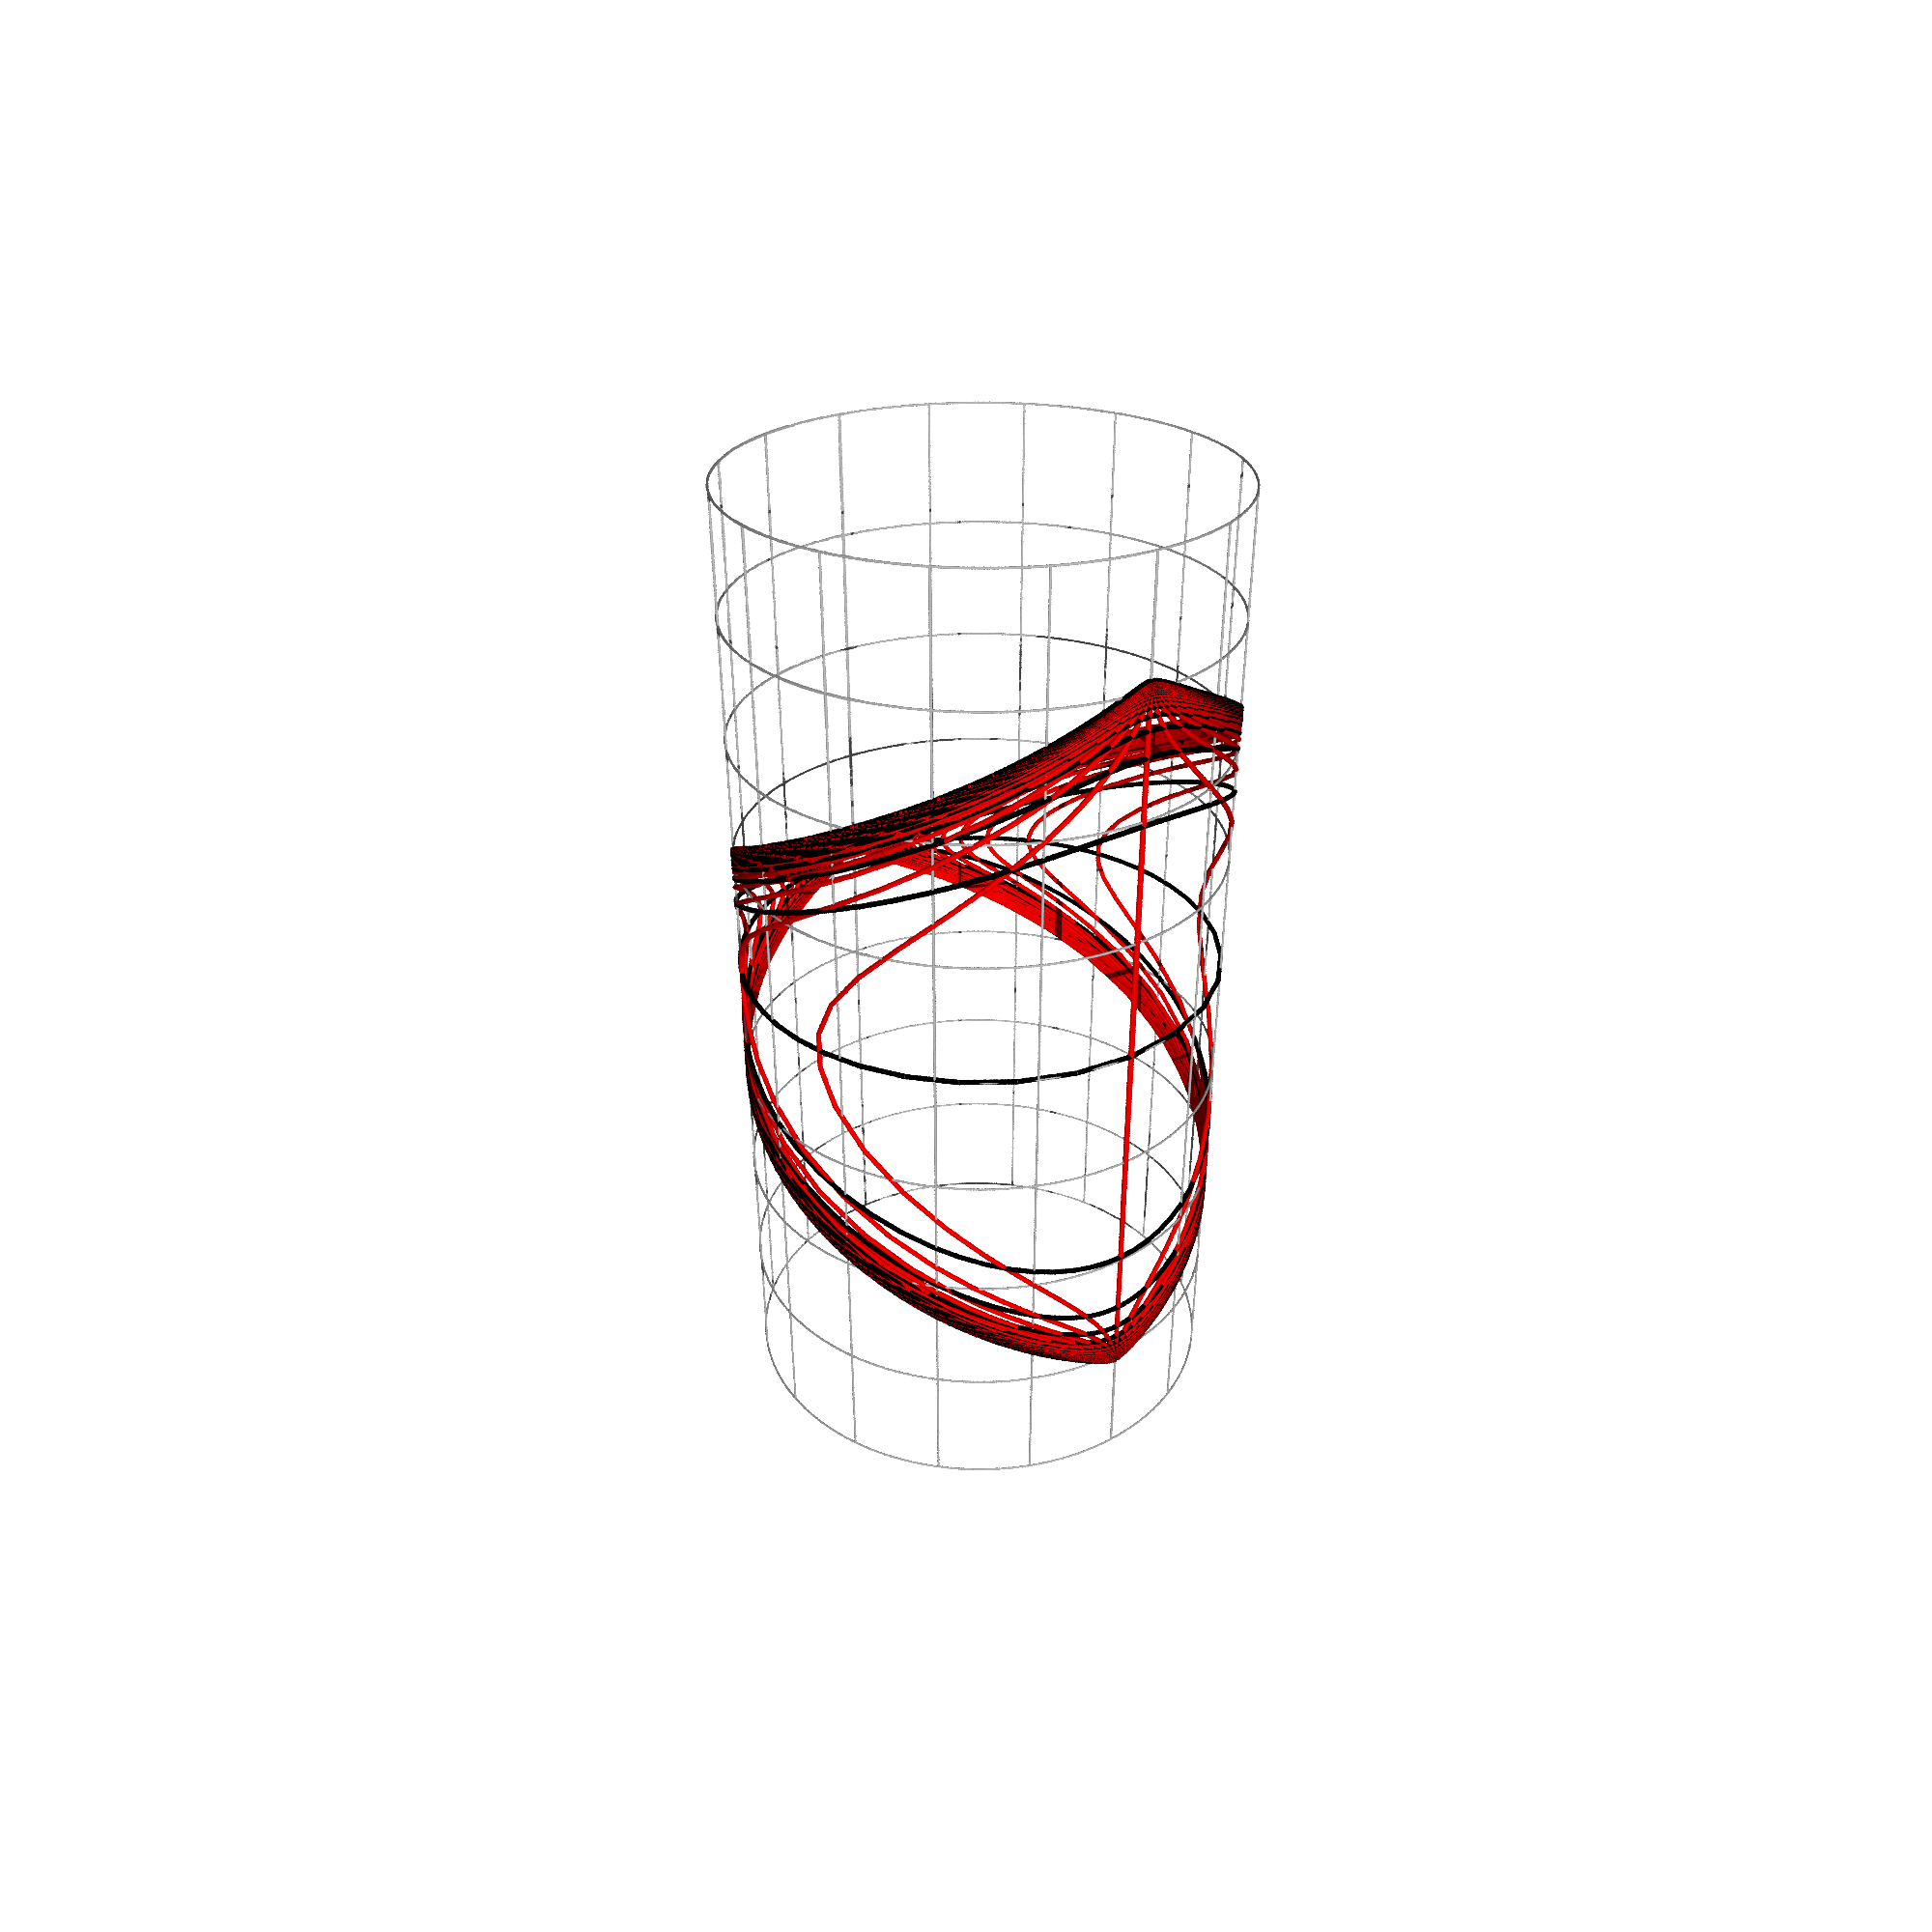

In [80]:
graph = (graphE+graphM).rotate((0,0,1), 0.2)
show(graph, aspect_ratio=(2,2,1), viewer='tachyon', frame=False, figsize=20)

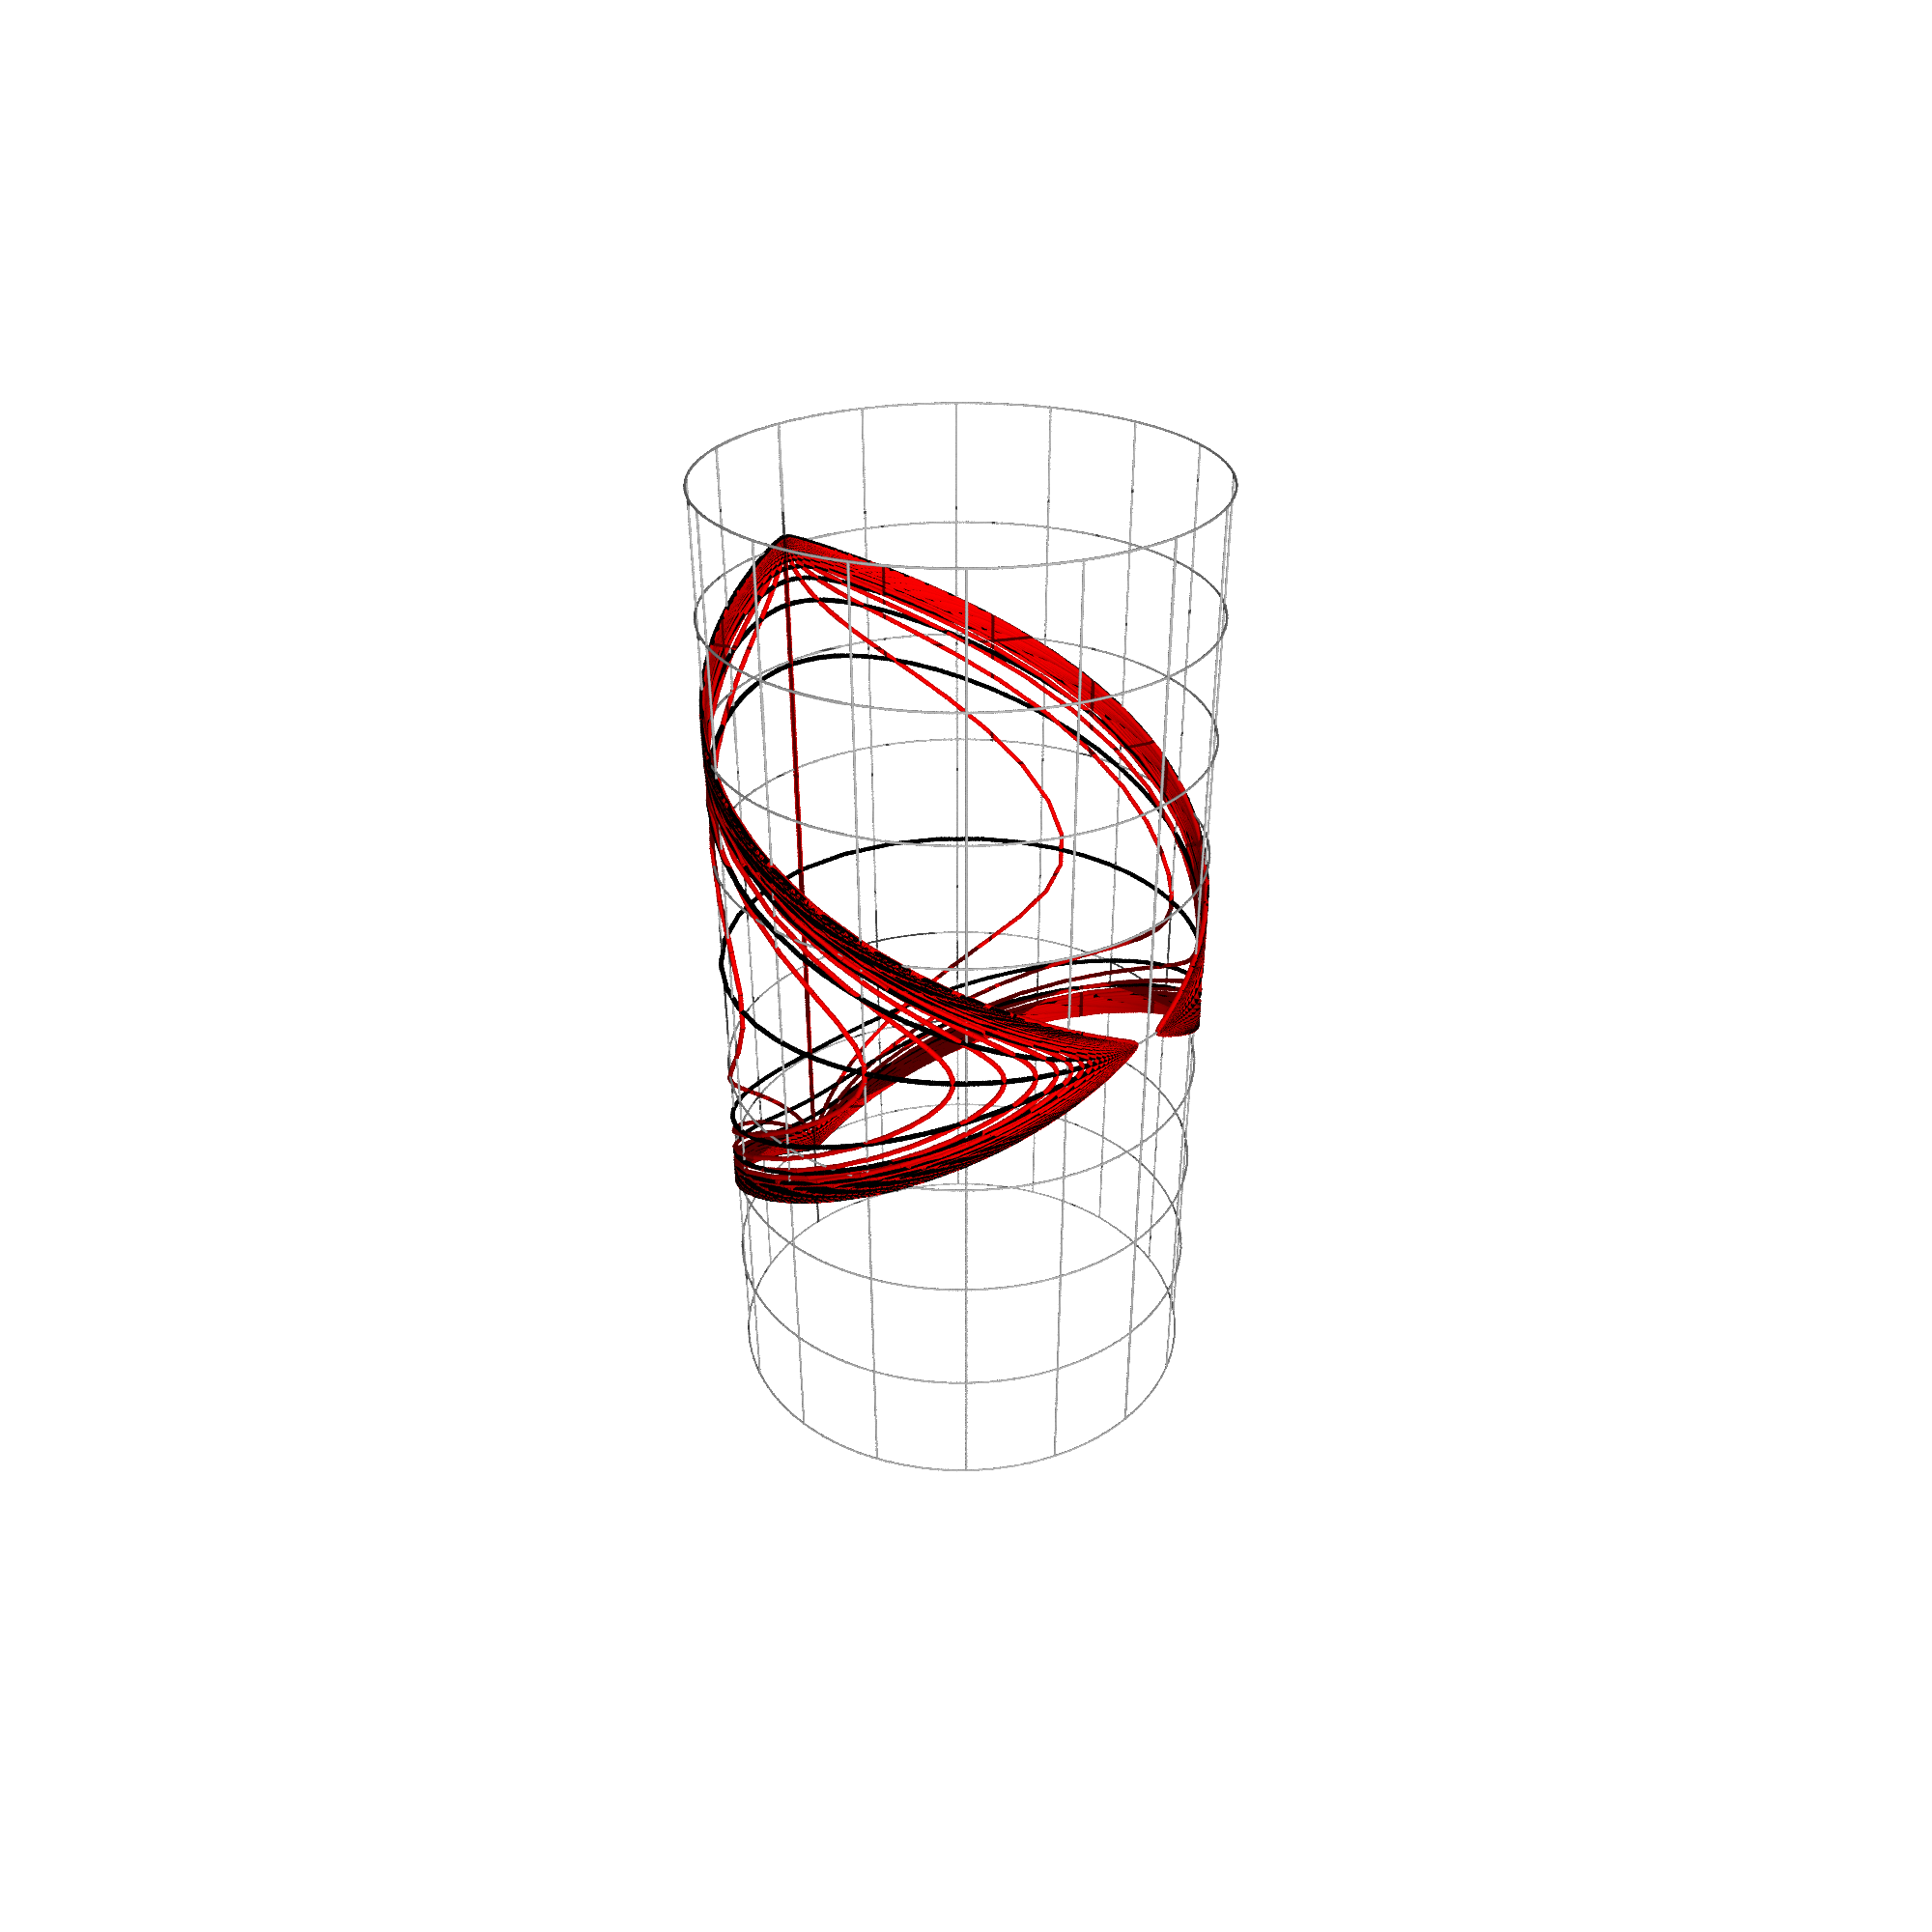

In [81]:
graph = (graphE+graphM).rotate((0,0,1), pi)
show(graph, aspect_ratio=(2,2,1), viewer='tachyon', frame=False, figsize=20)

In [82]:
graphMN = XN.plot(X5, ambient_coords=(W,X,tau), mapping=Theta, fixed_coords={th:pi/2, ph:0.001}, 
                  max_range=16, nb_values=21, plot_points=150, color='green', 
                  style={u: '-', v: ':'}, label_axes=False)  # phi = 0 
graphMN += XN.plot(X5, ambient_coords=(W,X,tau), mapping=Theta, fixed_coords={th:pi/2, ph:pi}, 
                   max_range=16, nb_values=21, plot_points=150, color='green', 
                   style={u: '-', v: ':'}, label_axes=False)  # phi = pi

In [83]:
show(graphE+graphMN, aspect_ratio=1, frame=False)

Graphics3d Object

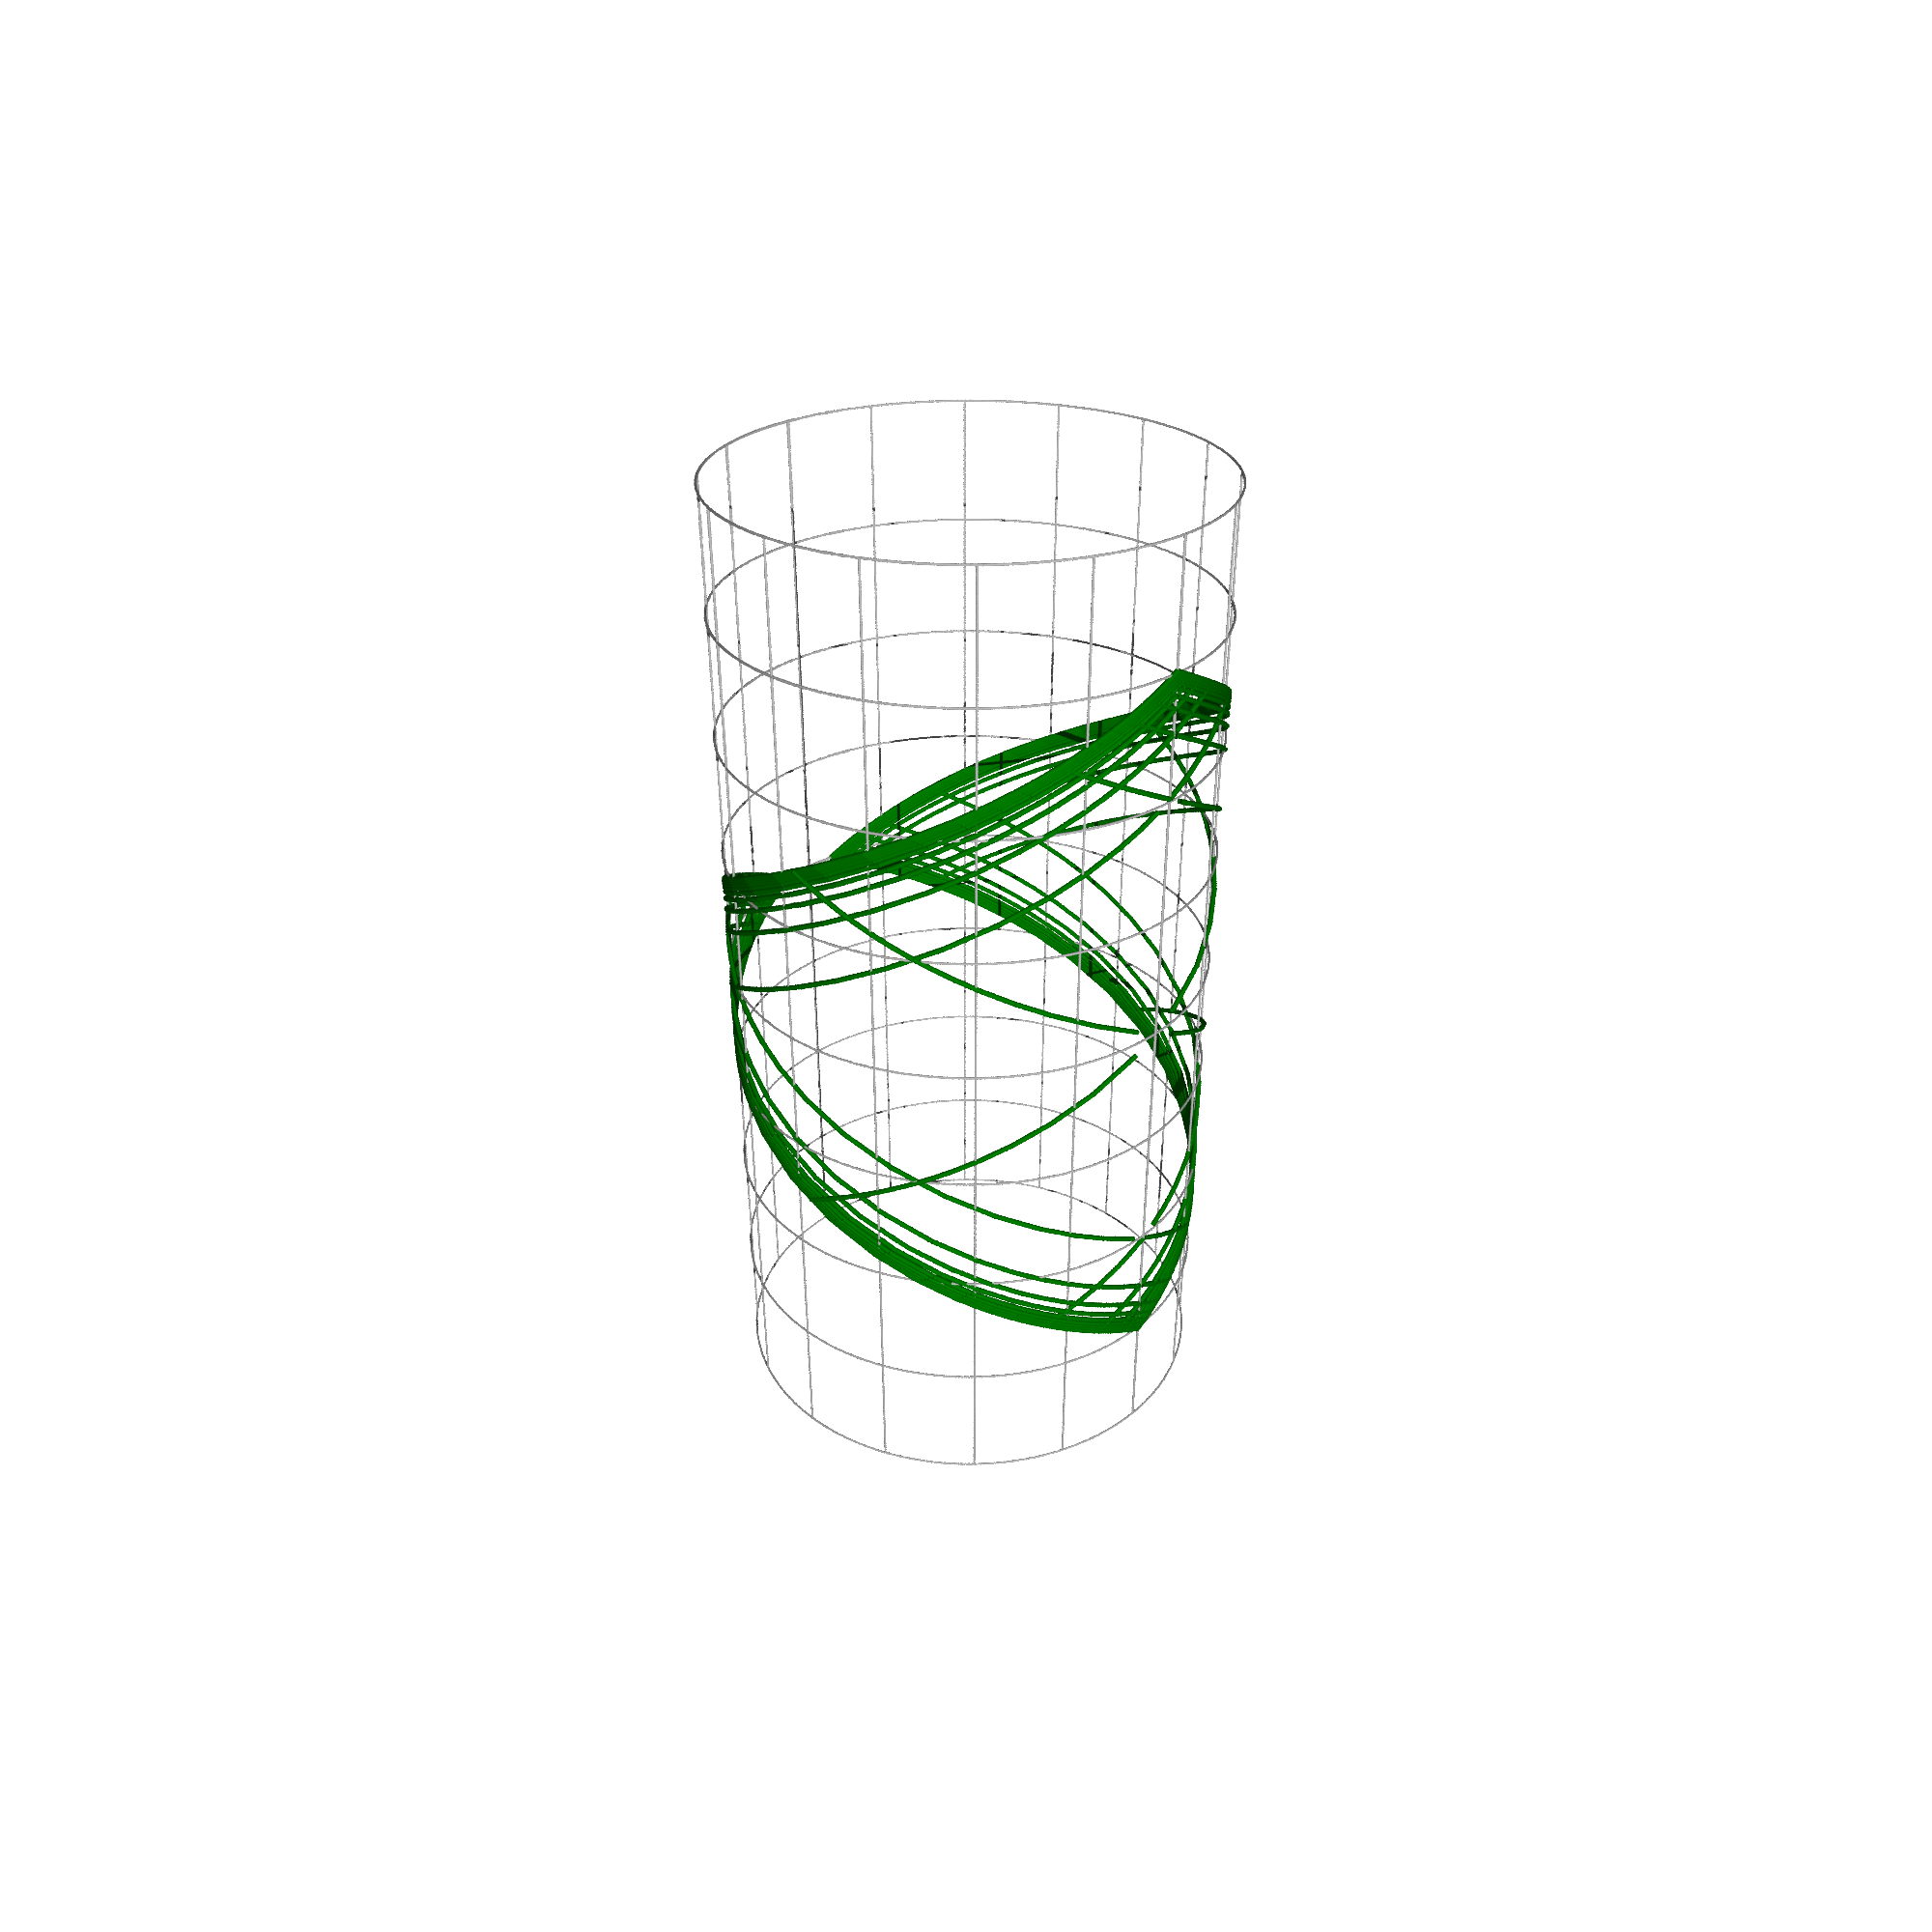

In [84]:
show(graphE+graphMN, aspect_ratio=(2,2,1), viewer='tachyon', frame=False, figsize=20)